In [43]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [44]:
df = pd.read_csv(r'Midterm_test\train_data.csv')
print(df.shape)
df.head()

(113, 22)


,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [45]:
# 檢查每個 column的遺失值個數
print(df.isna().sum())
# 檢查每個 column型別
print(df.dtypes)

name                           0
bonus                         52
deferral_payments             85
deferred_income               79
director_fees                100
email_address                 30
exercised_stock_options       32
expenses                      40
from_messages                 48
from_poi_to_this_person       48
from_this_person_to_poi       48
loan_advances                111
long_term_incentive           64
other                         44
poi                            0
restricted_stock              31
restricted_stock_deferred    103
salary                        40
shared_receipt_with_poi       48
to_messages                   48
total_payments                17
total_stock_value             15
dtype: int64
name                          object
bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                float64
email_address                 object
exercised_stock_options      float64
ex

In [62]:
# 刪除遺失值太多的欄位
print(len(df) * 0.7)
df_x = df.drop(columns=['director_fees', 'loan_advances', 'restricted_stock_deferred', 'deferral_payments', 'deferred_income', 'long_term_incentive'])

# 去除跟個人資訊有關的欄位
df_x = df_x.drop(columns=['poi', 'name', 'email_address'])

# 檢查每個 column的遺失值個數
print(df_x.isna().sum())

79.1
bonus                      52
exercised_stock_options    32
expenses                   40
from_messages              48
from_poi_to_this_person    48
from_this_person_to_poi    48
other                      44
restricted_stock           31
salary                     40
shared_receipt_with_poi    48
to_messages                48
total_payments             17
total_stock_value          15
dtype: int64


In [63]:
df_x.describe()

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,6.100000e+01,8.100000e+01,73.000000,65.000000,65.000000,65.000000,6.900000e+01,8.200000e+01,7.300000e+01,65.000000,65.000000,9.600000e+01,9.800000e+01
mean,1.147436e+06,2.985081e+06,51040.547945,711.323077,64.800000,40.092308,4.471774e+05,1.294855e+06,2.739025e+05,1111.369231,2156.061538,2.590977e+06,3.527136e+06
std,1.505189e+06,6.004174e+06,47596.682104,2074.497628,91.863214,88.901407,1.341564e+06,2.498335e+06,1.716647e+05,1165.852016,2811.676718,1.056645e+07,7.182997e+06
min,7.000000e+04,3.285000e+03,148.000000,12.000000,0.000000,0.000000,2.000000e+00,4.409300e+04,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.500000e+05,4.004780e+05,18834.000000,19.000000,10.000000,0.000000,9.720000e+02,2.689220e+05,2.061210e+05,178.000000,517.000000,3.024025e+05,4.211518e+05
50%,7.500000e+05,8.500100e+05,41953.000000,45.000000,28.000000,7.000000,5.238200e+04,4.628225e+05,2.516540e+05,599.000000,1088.000000,1.106740e+06,9.979710e+05
75%,1.000000e+06,2.165172e+06,59175.000000,215.000000,88.000000,27.000000,3.620960e+05,9.664905e+05,2.885890e+05,1902.000000,2649.000000,1.985668e+06,2.493616e+06
max,8.000000e+06,3.434838e+07,228763.000000,14368.000000,528.000000,411.000000,1.035973e+07,1.476169e+07,1.111258e+06,4527.000000,15149.000000,1.035598e+08,4.911008e+07


In [64]:
# 補值
print(df_x[['total_payments', 'total_stock_value']].median())
df_x[['total_payments']] = df_x[['total_payments']].fillna(1106740)
df_x[['total_stock_value']] = df_x[['total_stock_value']].fillna(997971)

total_payments       1106740.0
total_stock_value     997971.0
dtype: float64


<AxesSubplot:>

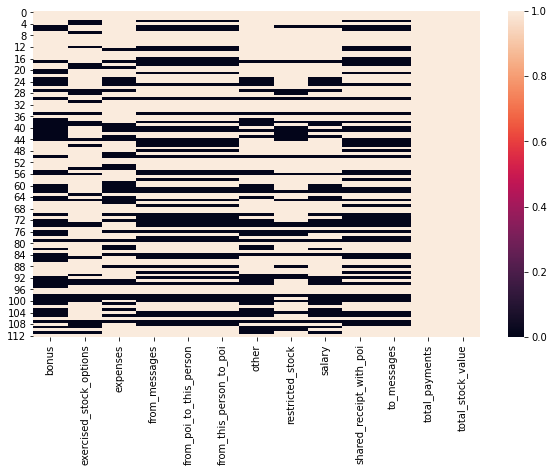

In [65]:
# 補值
# df_x = df_x.fillna(method='bfill')
# df_x = df_x.fillna(method='ffill')
plt.figure(figsize=(10, 6))
sn.heatmap(~df_x.isnull())

In [66]:
idx = df_x.drop(columns=['total_payments', 'total_stock_value']).dropna(how='all').index
df_x = df_x.iloc[idx]
print(df_x.shape)

(110, 13)


In [52]:
# plt.figure(figsize=(10, 6))
# sn.heatmap(~df_x.isnull())

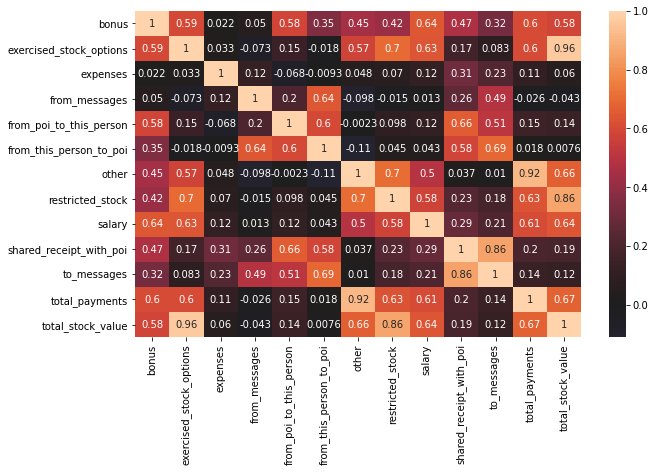

In [67]:
# 查看相關係數
plt.figure(figsize=(10, 6))
corrMatrix = df_x.corr()

sn.heatmap(corrMatrix, annot=True, center=0)
plt.show()

In [69]:
df_x = df_x.drop(columns=['from_poi_to_this_person', 'from_this_person_to_poi', 'to_messages', 'total_stock_value', 'total_payments'])
df_x = df_x.drop(columns=['exercised_stock_options', 'restricted_stock', 'other'])
df_x.corr()

,bonus,expenses,from_messages,salary,shared_receipt_with_poi
bonus,1.000000,0.021938,0.049639,0.640474,0.468583
expenses,0.021938,1.000000,0.124164,0.118565,0.306604
from_messages,0.049639,0.124164,1.000000,0.012728,0.261270
salary,0.640474,0.118565,0.012728,1.000000,0.287196
shared_receipt_with_poi,0.468583,0.306604,0.261270,0.287196,1.000000


In [70]:
df_x.describe()

,bonus,expenses,from_messages,salary,shared_receipt_with_poi
count,6.100000e+01,73.000000,65.000000,7.300000e+01,65.000000
mean,1.147436e+06,51040.547945,711.323077,2.739025e+05,1111.369231
std,1.505189e+06,47596.682104,2074.497628,1.716647e+05,1165.852016
min,7.000000e+04,148.000000,12.000000,4.770000e+02,2.000000
25%,4.500000e+05,18834.000000,19.000000,2.061210e+05,178.000000
50%,7.500000e+05,41953.000000,45.000000,2.516540e+05,599.000000
75%,1.000000e+06,59175.000000,215.000000,2.885890e+05,1902.000000
max,8.000000e+06,228763.000000,14368.000000,1.111258e+06,4527.000000


In [72]:
df_x.median()
df_x[['bonus']] = df_x[['bonus']].fillna(750000)
df_x[['expenses']] = df_x[['expenses']].fillna(41953)
df_x[['from_messages']] = df_x[['from_messages']].fillna(45)
df_x[['salary']] = df_x[['salary']].fillna(251654.0)
df_x[['shared_receipt_with_poi']] = df_x[['shared_receipt_with_poi']].fillna(599)
df_x.isnull().sum()

bonus                      0
expenses                   0
from_messages              0
salary                     0
shared_receipt_with_poi    0
dtype: int64

In [64]:
# # deferral_payments, deferred_income -0.85
# # exercised_stock_options, total_stock_value 0.96
# # other, total_payments 0.915708
# # restricated_stock, total_stock_value 0.86
# # shared_recipt_with_poi, to_messages 0.86

# # 刪除高度相關的欄位
# df_x.drop(columns=['total_stock_value', 'deferred_income', 'other', 'shared_receipt_with_poi'], inplace=True)
# plt.figure(figsize=(10, 6))
# corrMatrix = df_x.corr()
# sn.heatmap(corrMatrix, annot=True, center=0)
# plt.show()

In [73]:
# 標準化
# df_y = df['poi']
df_y = df.loc[idx, ['poi']]
df_sc = StandardScaler().fit_transform(df_x)

# 使用隨機森林找出重要因子
rf_c = RandomForestClassifier().fit(df_sc, df_y)
im_df = pd.DataFrame(data=rf_c.feature_importances_, index=df_x.columns)
im_df

<ipython-input-73-b546eea0fbc0>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_c = RandomForestClassifier().fit(df_sc, df_y)


,0
bonus,0.221944
expenses,0.251329
from_messages,0.136679
salary,0.228538
shared_receipt_with_poi,0.161510


In [74]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [75]:
# 使用 out of bag 查看有無 overfitting
rf_c = RandomForestClassifier(oob_score=True).fit(df_sc, df_y)
im_df = pd.DataFrame(data=rf_c.feature_importances_, index=df_x.columns)
print(rf_c.oob_score_)
im_df

0.8818181818181818


<ipython-input-75-001144b1e36d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_c = RandomForestClassifier(oob_score=True).fit(df_sc, df_y)


,0
bonus,0.207138
expenses,0.263684
from_messages,0.145633
salary,0.215084
shared_receipt_with_poi,0.168460


False    100
True      13
Name: poi, dtype: int64


<AxesSubplot:>

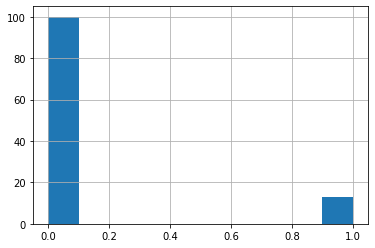

In [24]:
# 觀察 Y的分布狀況 -> 為不平衡狀態的資料
print(df['poi'].value_counts())
df['poi'].astype('int').hist()

In [76]:
# 使用 SMOTE 方法，來增加 poi = 1 的數量。
from imblearn.over_sampling import SMOTE
# for reproducibility purposes
seed = 100
# SMOTE number of neighbors
k = 1

sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
new_tuple = sm.fit_resample(df_x, df_y)
new_x = new_tuple[0]
new_y = new_tuple[1]

In [77]:
# 用生成過後的資料標準化
sds = StandardScaler().fit(new_x)
df_sc = sds.transform(new_x)

3

In [78]:
rf_c = RandomForestClassifier(oob_score=True, n_estimators=40, max_depth=5).fit(df_sc, new_y)
 
im_df = pd.DataFrame(data=rf_c.feature_importances_, index=new_x.columns)
print(rf_c.oob_score_)
im_df

0.8762886597938144


<ipython-input-78-f064c8c3d052>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_c = RandomForestClassifier(oob_score=True, n_estimators=40, max_depth=5).fit(df_sc, new_y)


,0
bonus,0.216412
expenses,0.256940
from_messages,0.143472
salary,0.132315
shared_receipt_with_poi,0.250861


# Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [80]:
lg_model = LogisticRegression().fit(df_sc, new_y)
pred_y = lg_model.predict(df_sc)

C:\Users\mia\anaconda3\envs\mypy\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [81]:
metrics.accuracy_score(new_y, pred_y)

0.8195876288659794

In [82]:
pred_y_rf = rf_c.predict(df_sc)
metrics.accuracy_score(pred_y_rf, pred_y)

0.8247422680412371

In [83]:
# 讀取測試集資料
test_df = pd.read_csv(r'D:\cupoy_learn\Midterm_test\test_features.csv')
test_df.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,...,NaN,NaN,210698.0,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0
1,BOWEN JR RAYMOND M,1350000.0,NaN,-833.0,NaN,raymond.bowen@enron.com,NaN,65907.0,27.0,140.0,...,NaN,974293.0,1621.0,252055.0,NaN,278601.0,1593.0,1858.0,2669589.0,252055.0
2,HANNON KEVIN P,1500000.0,NaN,-3117011.0,NaN,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,...,NaN,1617011.0,11350.0,853064.0,NaN,243293.0,1035.0,1045.0,288682.0,6391065.0
3,DELAINEY DAVID W,3000000.0,NaN,NaN,NaN,david.delainey@enron.com,2291113.0,86174.0,3069.0,66.0,...,NaN,1294981.0,1661.0,1323148.0,NaN,365163.0,2097.0,3093.0,4747979.0,3614261.0
4,CAUSEY RICHARD A,1000000.0,NaN,-235000.0,NaN,richard.causey@enron.com,NaN,30674.0,49.0,58.0,...,NaN,350000.0,307895.0,2502063.0,NaN,415189.0,1585.0,1892.0,1868758.0,2502063.0


In [84]:
# 把沒有使用到的欄位刪除
# test_df2 = test_df.drop(columns=['name', 'deferred_income', 'director_fees', 'email_address', 'loan_advances', 'other', 'restricted_stock_deferred', 
#                                 'shared_receipt_with_poi', 'total_stock_value'])
test_df2 = test_df[['bonus','expenses', 'from_messages', 'salary', 'shared_receipt_with_poi']]
test_df2.head()

,bonus,expenses,from_messages,salary,shared_receipt_with_poi
0,5249999.0,17355.0,484.0,213999.0,5521.0
1,1350000.0,65907.0,27.0,278601.0,1593.0
2,1500000.0,34039.0,32.0,243293.0,1035.0
3,3000000.0,86174.0,3069.0,365163.0,2097.0
4,1000000.0,30674.0,49.0,415189.0,1585.0


In [50]:
# values = {'bonus': new_x[['bonus']].median()[0], 'deferral_payments': new_x[['deferral_payments']].median()[0],
#          'exercised_stock_options': new_x[['exercised_stock_options']].median()[0], 'expenses': new_x[['expenses']].median()[0],
#          'from_messages': new_x[['from_messages']].median()[0], 'from_poi_to_this_person': new_x[['from_poi_to_this_person']].median()[0],
#          'from_this_person_to_poi': new_x[['from_this_person_to_poi']].median()[0], 'long_term_incentive': new_x[['long_term_incentive']].median()[0],
#          'restricted_stock': new_x[['restricted_stock']].median()[0], 'salary': new_x[['salary']].median()[0],
#          'to_messages': new_x[['to_messages']].median()[0], 'total_payments': new_x[['total_payments']].median()[0]}

# test_df = test_df.fillna(value=values)
# test_df.head()

In [85]:
test_df2.describe()

,bonus,expenses,from_messages,salary,shared_receipt_with_poi
count,2.100000e+01,2.200000e+01,21.000000,2.200000e+01,21.000000
mean,5.937791e+06,3.001494e+05,291.428571,1.518799e+06,1377.952381
std,2.097902e+07,1.102936e+06,702.655433,5.628470e+06,1222.687306
min,1.000000e+05,2.151000e+03,12.000000,7.639900e+04,3.000000
25%,4.250000e+05,3.428375e+04,25.000000,2.196135e+05,702.000000
50%,1.000000e+06,6.181700e+04,29.000000,2.728470e+05,1074.000000
75%,2.000000e+06,9.618200e+04,75.000000,3.692830e+05,1604.000000
max,9.734362e+07,5.235198e+06,3069.000000,2.670423e+07,5521.000000


In [87]:
# test_df2 = test_df2.fillna(method='bfill')
# test_df2 = test_df2.fillna(method='ffill')
test_df2.median()
test_df2[['bonus']] = test_df2[['bonus']].fillna(1000000)
test_df2[['expenses']] = test_df2[['expenses']].fillna(61817)
test_df2[['from_messages']] = test_df2[['from_messages']].fillna(29)
test_df2[['salary']] = test_df2[['salary']].fillna(272847)
test_df2[['shared_receipt_with_poi']] = test_df2[['shared_receipt_with_poi']].fillna(1074)
# test_df2[['total_payments']] = test_df2[['total_payments']].fillna(1061827)
# test_df2[['total_stock_value']] = test_df2[['total_stock_value']].fillna(1838142)
test_df2.isna().sum()

C:\Users\mia\anaconda3\envs\mypy\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


bonus                      0
expenses                   0
from_messages              0
salary                     0
shared_receipt_with_poi    0
dtype: int64

In [88]:
test_x = sds.transform(test_df2)
pred = rf_c.predict(test_x)
# pred = lg_model.predict(test_x)

In [89]:
test_ans = pd.DataFrame(columns=['name', 'poi'])
test_ans['name'] = test_df['name']
test_ans['poi'] = pred
test_ans = test_ans.replace([False, True], [0, 1])
test_ans.to_csv(r'D:\cupoy_learn\Midterm_test\test_pred_0614_median_rf2.csv', index=False)

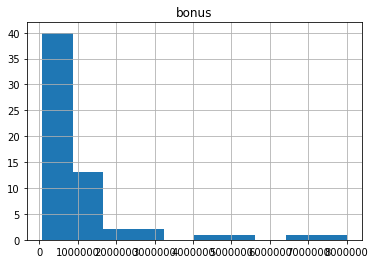

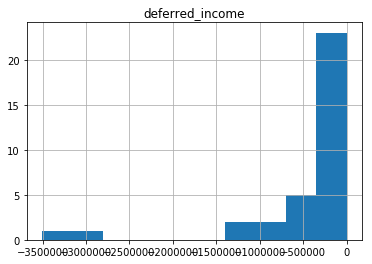

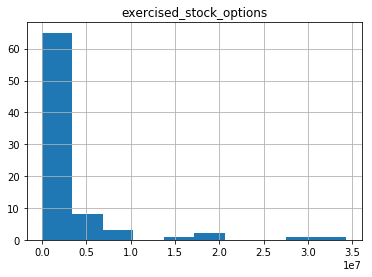

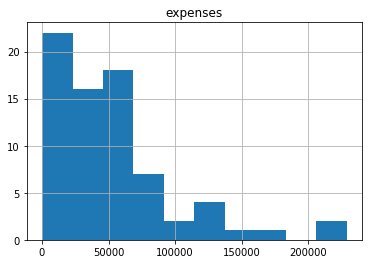

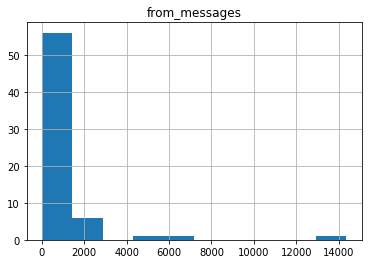

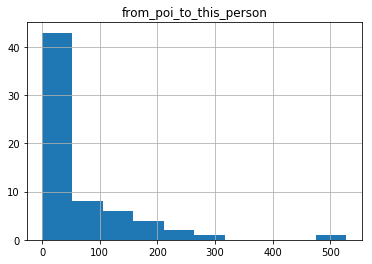

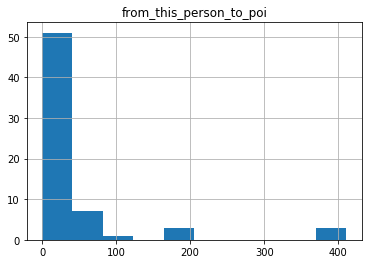

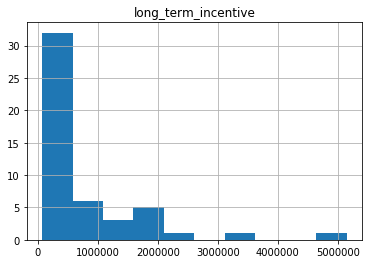

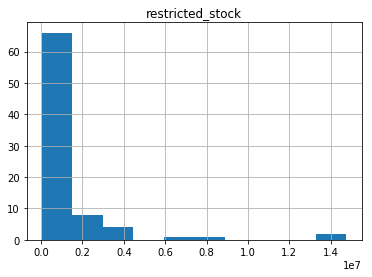

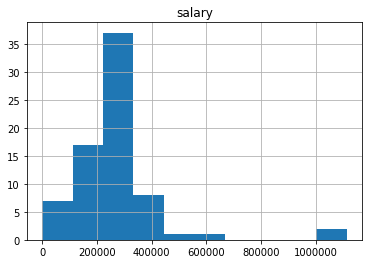

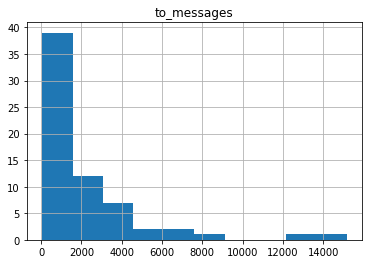

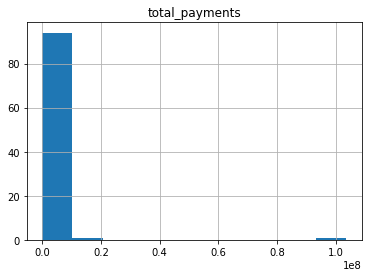

In [31]:
for item, value in enumerate(df.dtypes):
    if value == 'float64':
        df.hist(column=df.columns[item])